# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [14]:
new_cols = [col.lower() for col in df.columns]
#set equal to df.columns if you want the change to take place
new_cols

['c/a',
 'unit',
 'scp',
 'station',
 'linename',
 'division',
 'date',
 'time',
 'desc',
 'entries',
 'exits                                                               ']

## Change the Index to be the Line Names

In [15]:
df = df.set_index('LINENAME')
df.head()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
LINENAME,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the index back

In [16]:
df = df.reset_index() 
df.head()

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [17]:
#create column Num_Lines
#seperate LineNames by letter, so we have to seperate them ito a list
#This is the data in the column
#the letters in the string have to be in order of least to greatest
               
df['Num_Lines'] = df.LINENAME.map(lambda x: len(x))

df.head()
#df['Num_Lines'] is the new column
#df.LINENAME.map is defining the information in the column
#lambda x means this is the range od all the info
#and len(x) means we are counting the x values

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


## Write a function to clean a column name

In [18]:

def clean(name_col):
    cleaned = name_col.title()
    return cleaned
#df.head()
#We can also check an individual column type rather then all 
#df['UNIT'] = df.UNIT.astype(float) #Changing the column to float
#df.head() #Checking our changes
df.columns = [clean(i) for i in df.columns]
df

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7
5,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425,7
6,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460,7
7,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,04:00:00,REGULAR,6736696,2283461,7
8,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,08:00:00,REGULAR,6736705,2283483,7
9,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,12:00:00,REGULAR,6736746,2283524,7


In [9]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
#df.columns = [clean('EXITS') for col in df.columns] 

In [ ]:
# Checking the output, we can see the results.
df.columns

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

In [25]:
df.head()

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


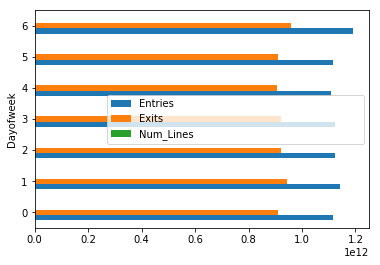

In [26]:
df.Date = pd.to_datetime(df.Date)
df['Dayofweek'] = df.Date.dt.dayofweek
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind='barh')

In [28]:
df.head()

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Dayofweek
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,5
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,5
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,5


In [31]:
df.Dayofweek

0         5
1         5
2         5
3         5
4         5
5         5
6         6
7         6
8         6
9         6
10        6
11        6
12        0
13        0
14        0
15        0
16        0
17        0
18        1
19        1
20        1
21        1
22        1
23        1
24        2
25        2
26        2
27        2
28        2
29        2
         ..
197595    0
197596    0
197597    0
197598    0
197599    0
197600    0
197601    1
197602    1
197603    1
197604    1
197605    1
197606    1
197607    2
197608    2
197609    2
197610    2
197611    2
197612    2
197613    3
197614    3
197615    3
197616    3
197617    3
197618    3
197619    4
197620    4
197621    4
197622    4
197623    4
197624    4
Name: Dayofweek, Length: 197625, dtype: int64

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

In [40]:
wkend.columns

Index(['Entries',
       'Exits                                                               ',
       'Num_Lines', 'Dayofweek'],
      dtype='object')

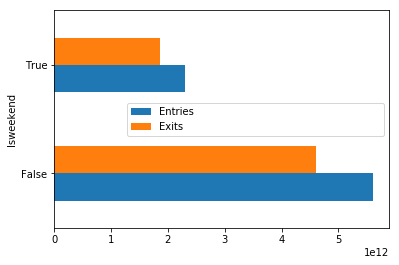

In [41]:
df['Isweekend'] = df.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = df.groupby('Isweekend').sum()
wkend[['Entries','Exits                                                               ']].plot(kind='barh')

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Drop a couple of columns

In [134]:
# Your code here
df = df.drop(['UNIT', 'STATION'], axis=1)
df.head()

,LINENAME,C/A,SCP,DIVISION,DATE,TIME,DESC,EXITS,Num_Lines,Dayofweek
0,NQR456W,A002,02-00-00,BMT,2018-08-25,00:00:00,REGULAR,2283184,7,5
1,NQR456W,A002,02-00-00,BMT,2018-08-25,04:00:00,REGULAR,2283188,7,5
2,NQR456W,A002,02-00-00,BMT,2018-08-25,08:00:00,REGULAR,2283229,7,5
3,NQR456W,A002,02-00-00,BMT,2018-08-25,12:00:00,REGULAR,2283314,7,5
4,NQR456W,A002,02-00-00,BMT,2018-08-25,16:00:00,REGULAR,2283384,7,5


## Summary

Great! You practiced your data cleanup-skills using Pandas.